# Colocate data from NorESM and CESM2 and calculate aerosol biases

In [8]:
import pyaerocom as pya
import xarray as xr
from warnings import filterwarnings
from imports import (
        np, xr, mpl, plt, os,
        sys, crt
    )
ccrs = crt.crs

base_dir = '/home/notebook/basics/saved_data/'

filterwarnings('ignore')
pya.__version__

'0.8.1.dev4'

In [9]:
cesm_path = '/home/notebook/basics/saved_data/aerosolratio_cesm2.nc'
noresm_path = '/home/notebook/basics/saved_data/aerosolratio_noresm.nc'


os.path.exists(cesm_path)

True

Assign metadata id values

Read into pyaerocom and regrid to the lower-resolution NorESM

In [10]:
cesmdata = pya.GriddedData(cesm_path)#, var_name='aerosol_ratio')
noresmdata = pya.GriddedData(noresm_path)#, var_name='aerosol_ratio')

cesm_regridded = cesmdata.regrid(noresmdata)
cesm_regridded

pyaerocom.GriddedData
Grid data: <iris 'Cube' of cesm_aero_ratio / (1) (latitude: 96; longitude: 144)>

In [11]:
cesmdata.metadata['data_id']='CESM'
noresmdata.metadata['data_id']='NorESM'

In [12]:
ds = xr.Dataset()
ds['noresm_ratio'] = noresmdata.to_xarray()
ds['cesm_ratio'] = cesm_regridded.to_xarray()
ds['aerosol_ratio_bias'] = ds['cesm_ratio'] - ds['noresm_ratio']
ds['fractional_ratio_bias'] = ds['aerosol_ratio_bias'] / ds['noresm_ratio']

Text(0.5,0,'Organic Aerosol Fraction')

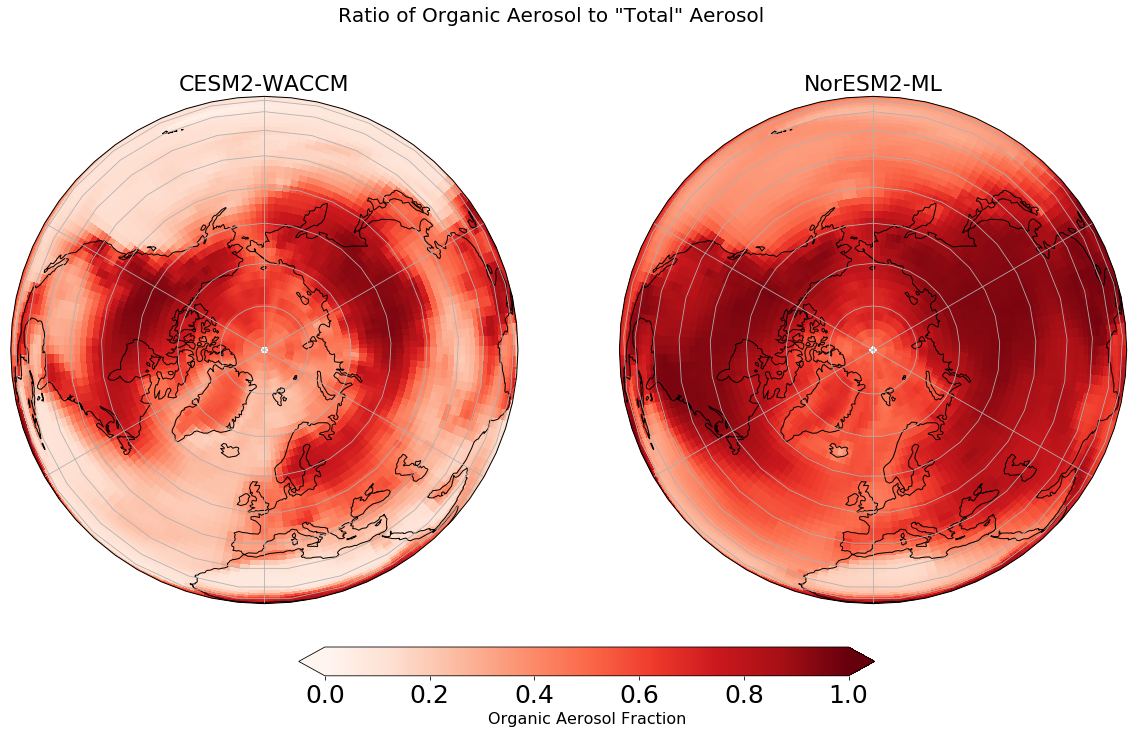

In [13]:
fig = plt.figure(1, figsize=[20,10])

# Plot 1 for Northern Hemisphere subplot argument (nrows, ncols, nplot)
# here 1 row, 2 columns and 1st plot
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

# Plot 2 for Southern Hemisphere
# 2nd plot 
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(0, 90))

minval = 0
maxval = 1

for ax,t,n in zip([ax1, ax2], ["cesm_ratio", "noresm_ratio"], ['CESM2-WACCM','NorESM2-ML']):
    map = ds[t].plot(ax=ax, vmin=minval, vmax=maxval, 
                                           transform=ccrs.PlateCarree(), 
                                           cmap='Reds', 
                                           add_colorbar=False)
    ax.set_title(n , fontsize=22)
    ax.coastlines()
    ax.gridlines()

    
# Title for both plots
fig.suptitle('Ratio of Organic Aerosol to "Total" Aerosol', fontsize=20)


cb_ax = fig.add_axes([0.325, 0.05, 0.4, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_xlabel('Organic Aerosol Fraction', fontsize=16)

In [121]:
filename = "aero_ratio_comparison_polar"
fig.savefig(base_dir + filename  + '.pdf')
fig.clf()

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

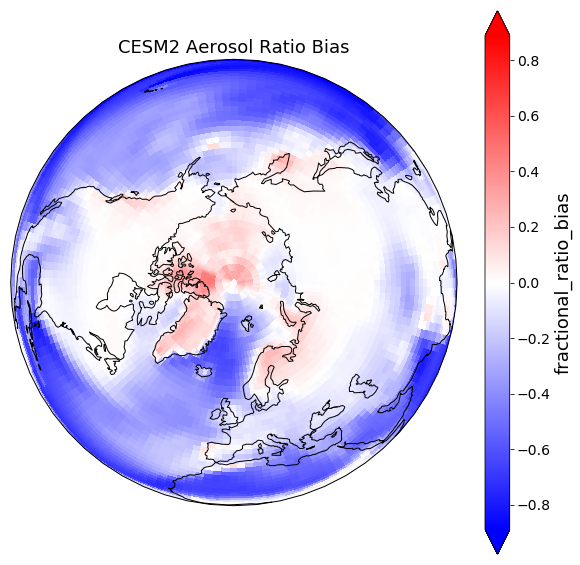

In [92]:
fig2 = plt.figure(2, figsize=[10,10])

# We're using cartopy and are plotting in Orthographic projection 
# (see documentation on cartopy)
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()

# We need to project our data to the new Orthographic projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
#noresm_ratio.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='coolwarm', robust=True)
#ds['aerosol_ratio_bias'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', robust=True)
ds['fractional_ratio_bias'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='bwr', robust=True)

# One way to customize your title
plt.title('CESM2 Aerosol Ratio Bias', fontsize=18)
plt.colorbar

Text(0.5,0,'Organic Aerosol Fraction')

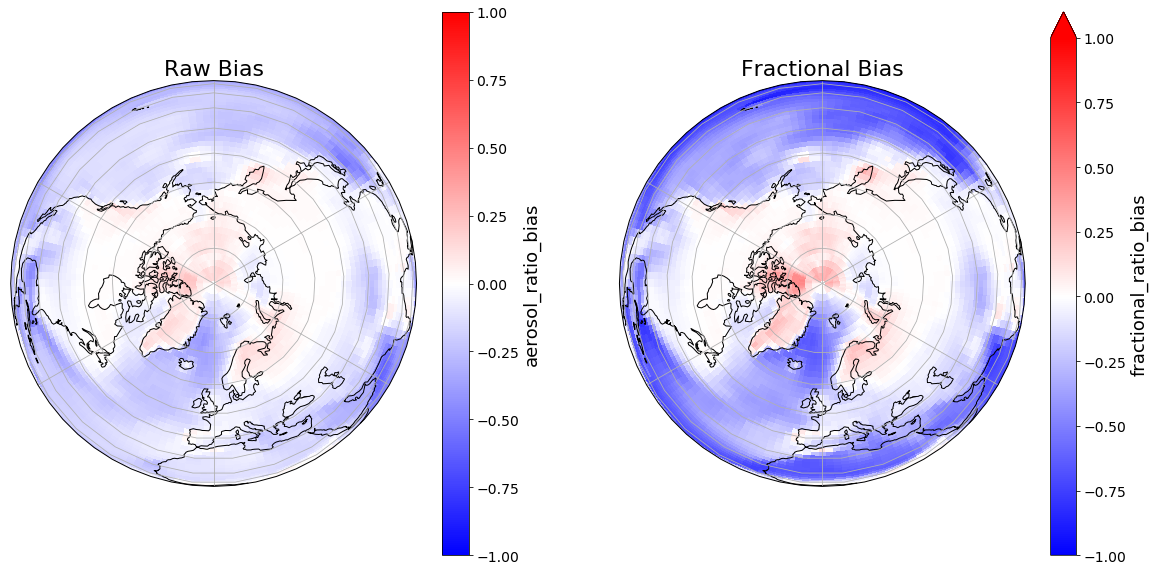

In [124]:
fig2 = plt.figure(2, figsize=[20,10])

# Plot 1 for Northern Hemisphere subplot argument (nrows, ncols, nplot)
# here 1 row, 2 columns and 1st plot
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

# Plot 2 for Southern Hemisphere
# 2nd plot 
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(0, 90))

minval = -1
maxval = 1

for ax,t,n in zip([ax1, ax2], ["aerosol_ratio_bias", "fractional_ratio_bias"], ['Raw Bias','Fractional Bias']):
    map = ds[t].plot(ax=ax, vmin=minval, vmax=maxval,
                                           transform=ccrs.PlateCarree(), 
                                           cmap='bwr', 
                                           add_colorbar=True)
    ax.set_title(n , fontsize=22)
    ax.coastlines()
    ax.gridlines()

    
# Title for both plots
fig.suptitle('CESM2-WACCM bias in Organic Aerosol ratio to CESM2', fontsize=20)

cb_ax = fig.add_axes([0.325, 0.05, 0.4, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_xlabel('Organic Aerosol Fraction', fontsize=16)

Text(0.5,22.2,'Organic Aerosol Fraction')

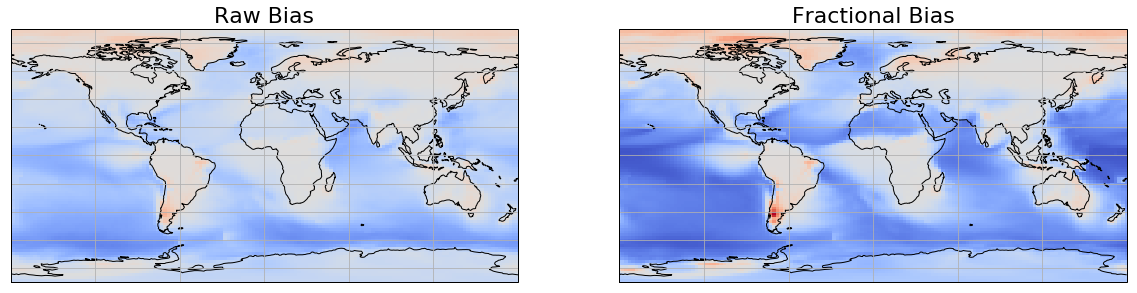

In [111]:
fig2 = plt.figure(2, figsize=[20,10])

# Plot 1 for Northern Hemisphere subplot argument (nrows, ncols, nplot)
# here 1 row, 2 columns and 1st plot
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())

# Plot 2 for Southern Hemisphere
# 2nd plot 
ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())

minval = -1
maxval = 1

for ax,t,n in zip([ax1, ax2], ["aerosol_ratio_bias", "fractional_ratio_bias"], ['Raw Bias','Fractional Bias']):
    map = ds[t].plot(ax=ax, vmin=minval, vmax=maxval,
                                           transform=ccrs.PlateCarree(), 
                                           cmap='coolwarm', 
                                           add_colorbar=False)
    ax.set_title(n , fontsize=22)
    ax.coastlines()
    ax.gridlines()

    
# Title for both plots
fig.suptitle('CESM2-WACCM bias in Organic Aerosol ratio to CESM2', fontsize=20)

cb_ax = fig.add_axes([0.325, 0.05, 0.4, 0.04])

cbar = plt.colorbar(map, cax=cb_ax)#, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_xlabel('Organic Aerosol Fraction', fontsize=16)

In [112]:
ds

<xarray.Dataset>
Dimensions:                (lat: 96, lon: 144)
Coordinates:
  * lat                    (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * lon                    (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
    lev                    float64 ...
    month                  int64 ...
Data variables:
    noresm_ratio           (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    cesm_ratio             (lat, lon) float32 ...
    aerosol_ratio_bias     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    fractional_ratio_bias  (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>

In [117]:
ds['noresm_ratio']

<xarray.DataArray 'noresm_ratio' (lat: 96, lon: 144)>
dask.array<filled, shape=(96, 144), dtype=float32, chunksize=(96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    lev      float64 ...
    month    int64 ...
Attributes:
    from_files:        ['/home/notebook/shared-cmip6-for-ns1000k/hist-aer/Had...
    data_id:           n/d
    var_name_read:     n/d
    ts_type:           n/d
    regridded:         False
    outliers_removed:  False
    computed:          False
    concatenated:      False

In [118]:
{'Zeppelin': [78.907206, 11.885593]}

{'Zeppelin': [78.907206, 11.885593]}